### For the use of all luxpy functions used here see:
### https://github.com/ksmet1977/luxpy 
### Tutorial: https://doi.org/10.1080/15502724.2018.1518717 

# Some short evaluations for $f_{1}^{'}$ in a more general form

In [1]:
# Use some packages
import luxpy as lx
import numpy as np
from matplotlib import pyplot
from matplotlib import cm
from matplotlib.ticker import LinearLocator
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

### Demonstration code for EMPIR 19nrm02

In [2]:
from empir19nrm02 import _RES, _SPD
from empir19nrm02.f1prime import py_f1PrimeG, py_f1PrimeGlx
from empir19nrm02.tools import plotSelectedSPD, plotYxy, plotHist, plotCorrMatrixSamll, plotHistScales

## Read some detector and spd data from the empir19nrm02 package
<li>every entry (spectral responsivity, SPD is a row in the matrix, the first row is containing the wavelength scale)</li>
<li>For all data files in this project the first (sometimes also the second) data set(s) are used for referecne
calculations (e.g. for detectors the first one is V(Lambda) and for SPDs the first is standard illuminant A
and the second one sometimes illuminant L41)</li>

### Select the source data for simulation (change the entries in res_data (True/False for the required data sets)
### Detector Data
<li>VLDetectors: Current Collection</li>
<li>CIES025_VLDetectors: Collection from CIES025:2015</li>

In [3]:
res_data = { 'VLDetectors': True,
              'CIES025_VLDetectors': False
              }
detector_start_reading = True
detector_names = ''
print('Detector data base:')
for detector, enable in res_data.items():
    print('Name:', detector )
    print('    Size:', _RES[detector]['S']['data'].shape[0]-1 )
    print('    Use:', enable )
    if enable:
        detector_names = detector_names + detector + ' '
        if detector_start_reading:
            vldetectorsTemp=_RES[detector]['S']['data'].copy()
            wl_start = vldetectorsTemp[0].copy()
            detector_start_reading=False
        else:
            data_to_append = _RES[detector]['S']['data'].copy()
            interpolated_data = lx.cie_interp(data_to_append, wl_start, negative_values_allowed=True, kind='linear')
            vldetectorsTemp = np.vstack( (vldetectorsTemp, interpolated_data[1:]))

print( 'Detectors for the Simulation:')
print( '    Detectors:', detector_names)
print( '    Number of detectors:', vldetectorsTemp.shape[0]-1)

Detector data base:
Name: VLDetectors
    Size: 127
    Use: True
Name: CIES025_VLDetectors
    Size: 121
    Use: False
Detectors for the Simulation:
    Detectors: VLDetectors 
    Number of detectors: 127


In [4]:
bInterpol = True
if bInterpol:
    wl_interpol = lx.getwlr([380,780,1])
    vldetectors=lx.cie_interp(vldetectorsTemp, wl_interpol, negative_values_allowed=True, kind='S')
else:
    vldetectors=vldetectorsTemp

print( vldetectorsTemp.shape)
print( vldetectors.shape)

(128, 81)
(128, 401)


### Select the SPD data for simulation (change the entries in spd_data (True/False for the required data sets)
### SPD Data
<li>BB: Collection of Blackbody SPDs </li>
<li>PTLED':  Collection of PT White LEDs</li>
<li>CIES025_PTLED':  Collection of PT White LEDs used in CIES025:2015</li>
<li>OSRAM_PTLED':  Collection of PT White LEDs from OSRAM</li>
<li>RGBLED':  Collection of RGB White LEDs</li>
<li>CIES025_RGBLED':  Collection of RGB White LEDs used in CIES025:2015</li>
<li>PHOTOLED':  Collection of PT White LEDs from the PhotoLED-Project</li>
<li>MONOLED':  Collection of Monochrome LEDs</li>
<li>OSRAM_MONOLED':  Collection of Monochrome LEDs from OSRAM</li>

In [5]:
spd_data = {'BB': False,
            'PTLED': False,
            'CIES025_PTLED': True,
            'OSRAM_PTLED': False,
            'RGBLED':  False,
            'CIES025_RGBLED':  False,
            'PHOTOLED':  False,
            'MONOLED':  False,
            'OSRAM_MONOLED':  False}


spd_start_reading = True
spd_names = ''
print('SPD data base:')
for spd, enable in spd_data.items():
    print('Name:', spd, '\t\t\t', 'Size:', _SPD[spd]['S']['data'].shape[0]-1, '\t\t', 'Use:', enable)
    if enable:
        spd_names = spd_names + spd + ' '
        if spd_start_reading:
            spectra=_SPD[spd]['S']['data'].copy()
            wl_start = spectra[0].copy()
            spd_start_reading=False
        else:
            data_to_append = _SPD[spd]['S']['data'].copy()
            interpolated_data = lx.cie_interp(data_to_append, wl_start, negative_values_allowed=True, kind='S')
            spectra = np.vstack( (spectra, interpolated_data))

print( '\nSPDs for the Simulation:')
print( '    SPD:', spd_names)
print( '    Number of spds:', spectra.shape[0]-1)


SPD data base:
Name: BB 			 Size: 55 		 Use: False
Name: PTLED 			 Size: 229 		 Use: False
Name: CIES025_PTLED 			 Size: 228 		 Use: True
Name: OSRAM_PTLED 			 Size: 137 		 Use: False
Name: RGBLED 			 Size: 98 		 Use: False
Name: CIES025_RGBLED 			 Size: 97 		 Use: False
Name: PHOTOLED 			 Size: 1496 		 Use: False
Name: MONOLED 			 Size: 288 		 Use: False
Name: OSRAM_MONOLED 			 Size: 260 		 Use: False

SPDs for the Simulation:
    SPD: CIES025_PTLED 
    Number of spds: 228


### Two functions for the evaluation from the luxpy package

In [6]:
?lx.spectral_mismatch_and_uncertainty.f1prime

In [7]:
?lx.spectral_mismatch_and_uncertainty.get_spectral_mismatch_correction_factors

### Get some statistical data from the detectors

### Get all $f_{1}^{´}$ values (standard evaluation, weighting with illuminant A, target function $V(\lambda)$)

In [8]:
f1p=lx.spectral_mismatch_and_uncertainty.f1prime(vldetectors, S_C='A', cieobs='1931_2', s_target_index=2)

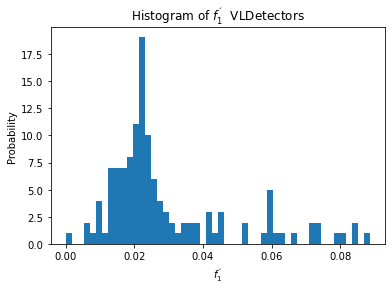

In [9]:
plotHist( f1p, xLabel='$f_{1}^{´}$', yLabel='Probability', title='Histogram of $f_{1}^{´}$  ' + detector_names, fileName='Histogram of f1Prime.png')

### Sort the detectors on their $f_{1}^{'}$ values to make the visualization easier

In [10]:
vldetectors[1:]=vldetectors[np.argsort(f1p)+1]
f1p=lx.spectral_mismatch_and_uncertainty.f1prime(vldetectors, S_C='A', cieobs='1931_2', s_target_index=2)

### Get all $f_{1,\mathrm{LED}}^{´}$ values (standard evaluation, weighting with illuminant LED_B3/L41, target function $V(\lambda)$)

(127,)


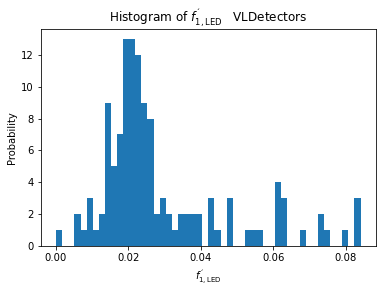

In [11]:
f1pLED=lx.spectral_mismatch_and_uncertainty.f1prime(vldetectors, S_C='LED_B3', cieobs='1931_2', s_target_index=2)
print(f1pLED.shape)
plotHist( f1pLED, xLabel='$f_{1,\mathrm{LED}}^{´}$', yLabel='Probability', title='Histogram of $f_{1,\mathrm{LED}}^{´}$   ' + detector_names, fileName='Histogram of f1PrimeLED.png')

### Let's have a look for the differences $f_{1}^{´}$-$f_{1,\mathrm{LED}}^{´}$ and  $f_{1}^{´}$-$f_{1}^{*}$ over $f_{1}^{´}$
#### BTW:  $f_{1}^{*}$ is using the weighting with Standard illuminant E (no weighting at all)

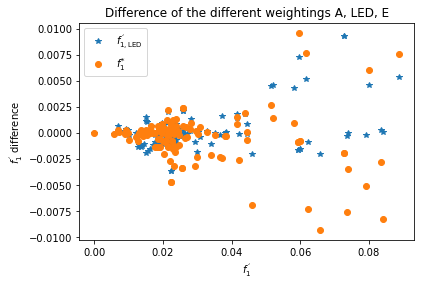

In [12]:
f1pE=lx.spectral_mismatch_and_uncertainty.f1prime(vldetectors, S_C='E', cieobs='1931_2', s_target_index=2)
pyplot.plot(f1p, f1p-f1pLED, '*', label='$f_{1,\mathrm{LED}}^{´}$')
pyplot.plot(f1p, f1p-f1pE, 'o', label='$f_{1}^{*}$')
pyplot.xlabel('$f_{1}^{´}$')
pyplot.ylabel('$f_{1}^{´}$ difference')
pyplot.title('Difference of the different weightings A, LED, E')
pyplot.legend()
pyplot.savefig('Difference of the different weightings A LED E.png')

## Let's work with the SPDs selected above

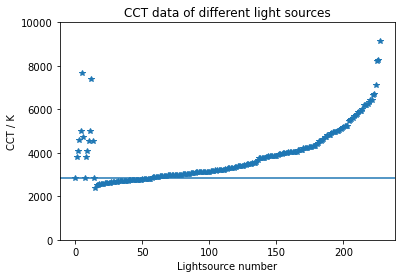

In [13]:
pyplot.plot(lx.xyz_to_cct(lx.spd_to_xyz(spectra)), "*")
pyplot.xlabel('Lightsource number')
pyplot.ylabel('CCT / K')
pyplot.ylim(0,10000)
pyplot.axhline(2856)
pyplot.title('CCT data of different light sources')
pyplot.savefig('Spectra_CCT.png')

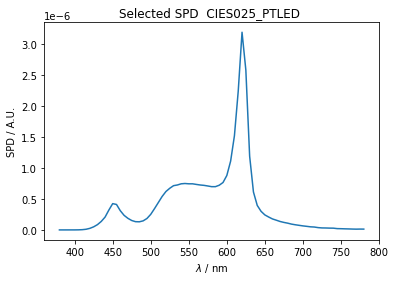

In [14]:
plotSelectedSPD( spectra, 20, title='Selected SPD  ' + spd_names, fileName='Spectra_Selected.png')

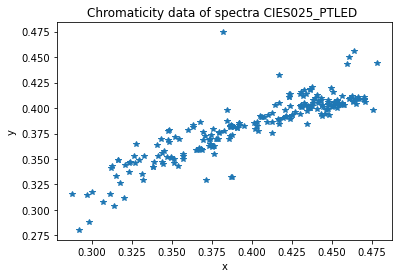

In [15]:
Yxy=lx.xyz_to_Yxy(lx.spd_to_xyz(spectra))
plotYxy( Yxy, title='Chromaticity data of spectra ' +  spd_names, fileName='SPD_Spectra_xy.png')

# Calculate the SMCF based on Illuminant A and SMCFLED based on Illuminant L41

In [16]:
SMCF=lx.spectral_mismatch_and_uncertainty.get_spectral_mismatch_correction_factors( spectra, vldetectors, S_C='A')
SMCFLED=lx.spectral_mismatch_and_uncertainty.get_spectral_mismatch_correction_factors( spectra, vldetectors, S_C='LED_B3')

In [17]:
print (spectra.shape)
print (SMCF.shape)

(229, 81)
(228, 127)


### The SMCF is an image now.
<ul>
<li><p>each column represents one detector</p></li>
<li><p>detectors are sorted by f1p</p></li>
<li><p>each row represents a SPD form our test set</p></li>
</ul>


In [18]:
def plotSMCFImage( SMCFData, vMin=0.95, vMax=1.05, dx=12, strTitle='Title', savefigure=True):
    fig = pyplot.figure(figsize=[dx, dx])
    im=pyplot.imshow(SMCFData, vmin=vMin, vmax=vMax, aspect='auto')
    pyplot.xlabel('detector#')
    pyplot.ylabel('SPD#')
    pyplot.title( strTitle)
    fig.colorbar(im, shrink=0.5, aspect=5)
    if savefigure:
        pyplot.savefig( strTitle + '.png')

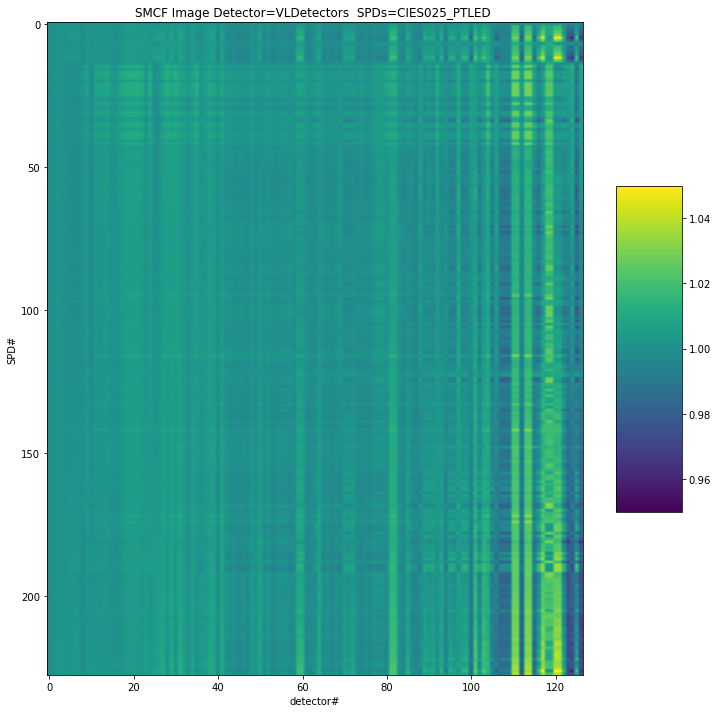

In [19]:
sMin=0.95
sMax=1.05

strTitle='SMCF Image Detector='+detector_names+' SPDs='+spd_names
plotSMCFImage(SMCF, vMin=sMin, vMax=sMax, strTitle=strTitle)

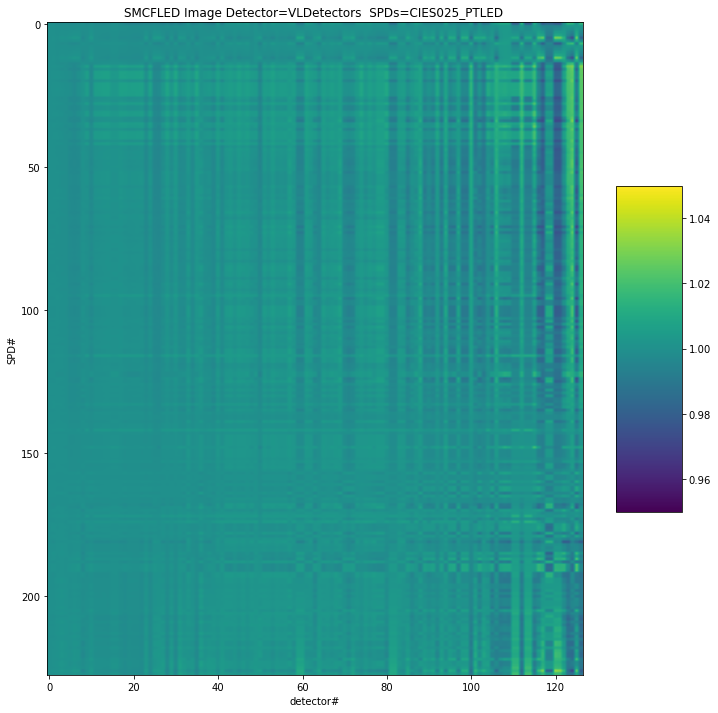

In [20]:
strTitle='SMCFLED Image Detector='+detector_names+' SPDs='+spd_names
plotSMCFImage(SMCFLED, vMin=sMin, vMax=sMax, strTitle=strTitle)

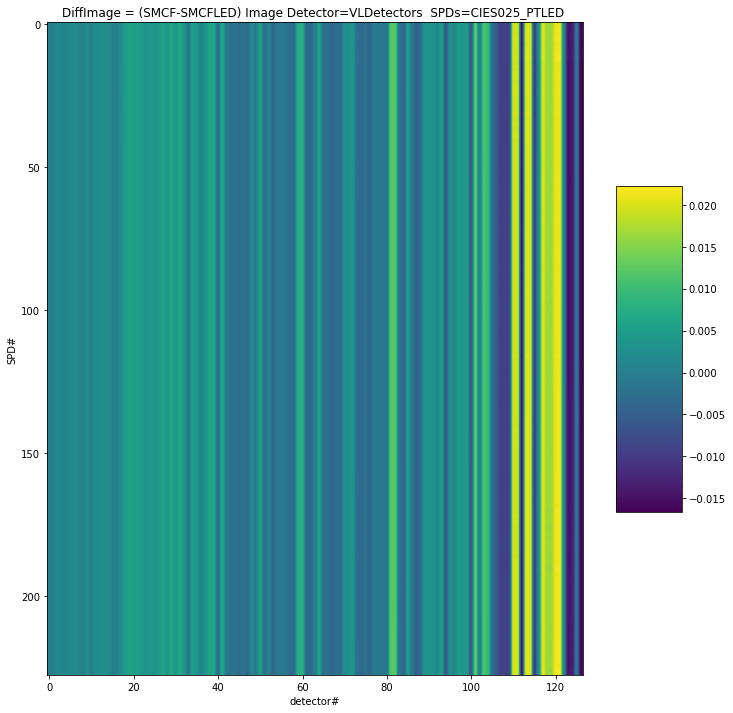

In [21]:
strTitle='DiffImage = (SMCF-SMCFLED) Image Detector='+detector_names+' SPDs='+spd_names
DiffImage=SMCF-SMCFLED
plotSMCFImage(DiffImage, strTitle=strTitle, vMin=np.min(DiffImage), vMax=np.max(DiffImage))

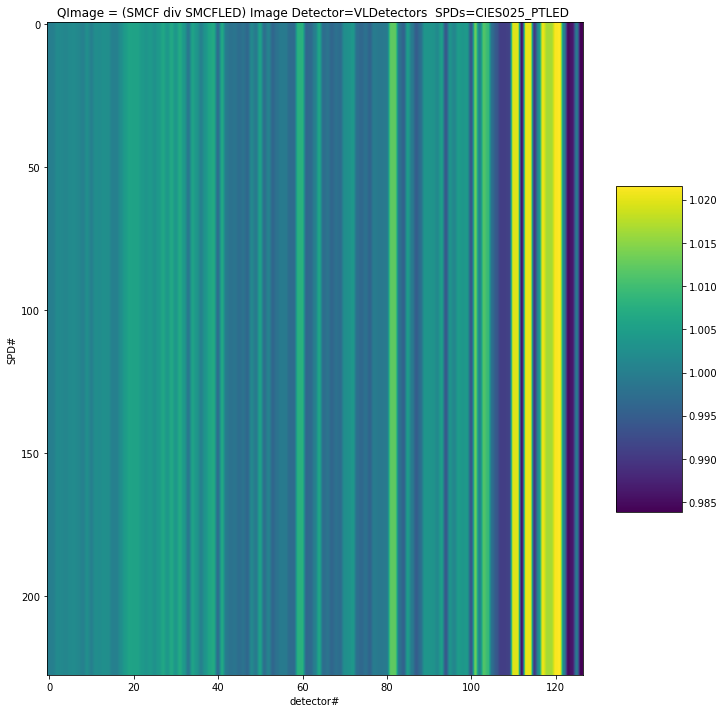

In [22]:
strTitle='QImage = (SMCF div SMCFLED) Image Detector='+detector_names+' SPDs='+spd_names
QImage=SMCF/SMCFLED
plotSMCFImage(QImage, strTitle=strTitle, vMin=np.min(QImage), vMax=np.max(QImage))

### Image in a 3D view.

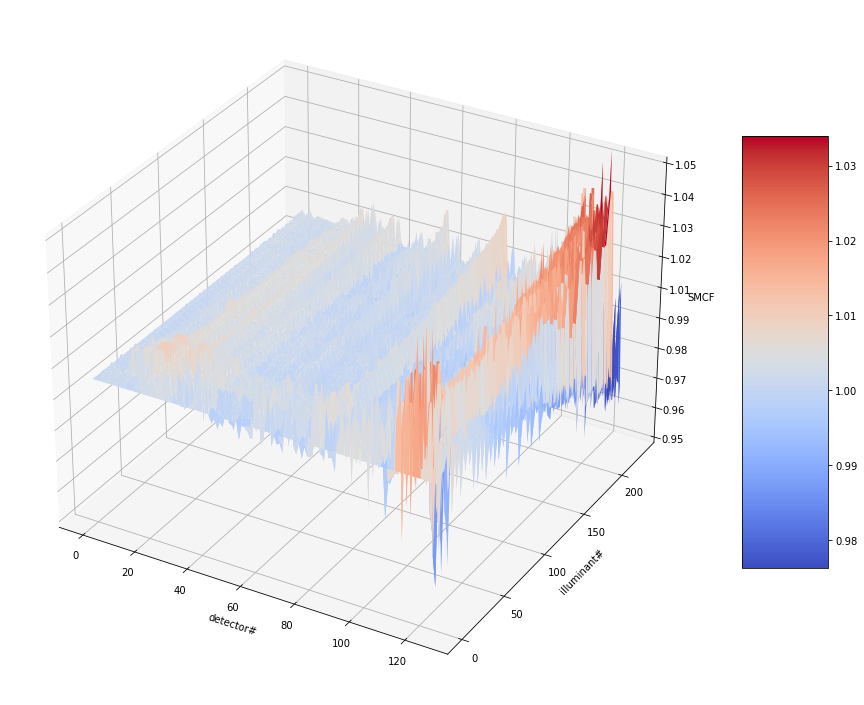

In [23]:
X = np.arange(0, vldetectors.shape[0]-1, 1)
Y = np.arange(0, spectra.shape[0]-1, 1)
X, Y = np.meshgrid(X, Y)
fig = pyplot.figure(figsize=[12, 12])
ax = Axes3D(fig)
surf = ax.plot_surface(X, Y, SMCF,cmap=cm.coolwarm)
# Customize the z axis.
ax.set_zlim(0.95, 1.05)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')
ax.set_xlabel('detector#')
ax.set_ylabel('illuminant#')
ax.set_zlabel('SMCF')
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
fig.show
pyplot.savefig('SMCF_Detector_f1Prime.png')

### Calculating all the different $f_{1}^{'}$ values.

In [24]:
dCutOff=0.006

f1pA=lx.spectral_mismatch_and_uncertainty.f1prime(vldetectors, S_C='A', cieobs='1931_2', s_target_index=2)
f1pE=lx.spectral_mismatch_and_uncertainty.f1prime(vldetectors, S_C='E', cieobs='1931_2', s_target_index=2)
f1pLED=lx.spectral_mismatch_and_uncertainty.f1prime(vldetectors, S_C='LED_B3', cieobs='1931_2', s_target_index=2)
f1pA_py=py_f1PrimeGlx(vldetectors, strObserver='1931_2', iObserverOffset = 1, strWeighting='A', iMin=0, dCutOff=0., dBandWidth=0.)
f1pAFMin=py_f1PrimeGlx(vldetectors, strObserver='1931_2', iObserverOffset = 1, strWeighting='A', iMin=1, dCutOff=0., dBandWidth=0.)
f1pAFCutOffR=py_f1PrimeGlx(vldetectors, strObserver='1931_2', iObserverOffset = 1, strWeighting='E', iMin=0, dCutOff=-dCutOff, dBandWidth=0.)
f1pp=py_f1PrimeGlx(vldetectors, strObserver='1931_2', iObserverOffset = 1, strWeighting='E', iMin=0, dCutOff=dCutOff, dBandWidth=0.)
f1pBW20nm=py_f1PrimeGlx(vldetectors, strObserver='1931_2', iObserverOffset = 1, strWeighting='A', iMin=0, dCutOff=0., dBandWidth=20.)
# Combine the results in a vector
f1pEval = np.vstack(( f1pA, f1pE, f1pLED, f1pAFMin, f1pAFCutOffR, f1pp, f1pBW20nm))

### What is the relation between $f_{1}^{´}$ and $f_{1}^{''}$

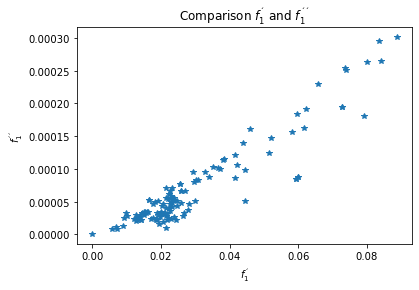

In [25]:
pyplot.plot(f1pA, f1pp, '*')
pyplot.xlabel('$f_{1}^{´}$')
pyplot.ylabel('$f_{1}^{´´}$')
pyplot.title('Comparison $f_{1}^{´}$ and $f_{1}^{´´}$')
pyplot.savefig('f1prime-f1primeprime comparison.png')

### What is the relation between $f_{1}^{´´}$ and $f_{1,\mathrm{R}}^{''}$

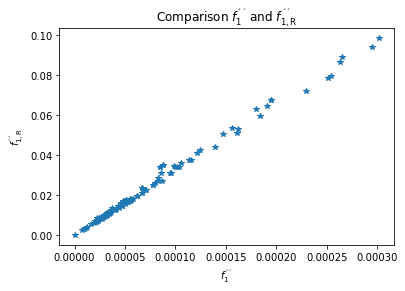

In [26]:
pyplot.plot(f1pp, f1pAFCutOffR, '*')
pyplot.xlabel('$f_{1}^{´´}$')
pyplot.ylabel('$f_{1,\mathrm{R}}^{´´}$')
pyplot.title('Comparison $f_{1}^{´´}$ and $f_{1, \mathrm{R}}^{´´}$')
pyplot.savefig('f1primeprime-f1primeprimeR comparison.png')

### Calculating the correlation between all the different $f_{1}^{'}$ values

In [27]:
f1pEvalCorr = np.corrcoef(f1pEval)

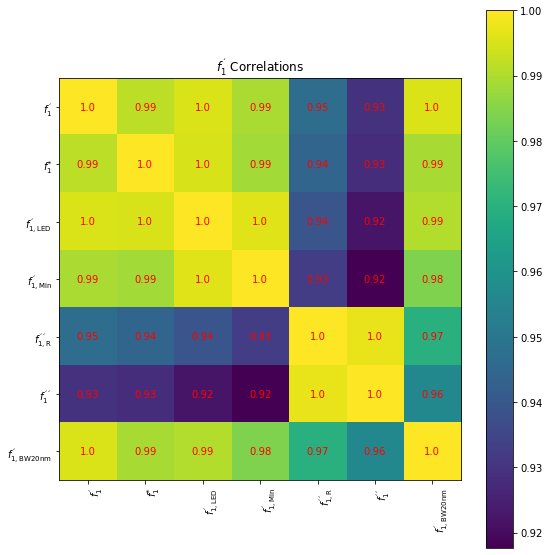

In [28]:
x_label_list = ['$f_{1}^{´}$', '$f_{1}^{*}$', '$f_{1,\mathrm{LED}}^{´}$', '$f_{1,\mathrm{Min}}^{´}$', '$f_{1,\mathrm{R}}^{´´}$', '$f_{1}^{´´}$', '$f_{1,\mathrm{BW20nm}}^{´}$']
plotCorrMatrixSamll(f1pEvalCorr, x_label_list, title='$f_{1}^{´}$ Correlations', fileName='f1p Correlations.png', with_values=True)

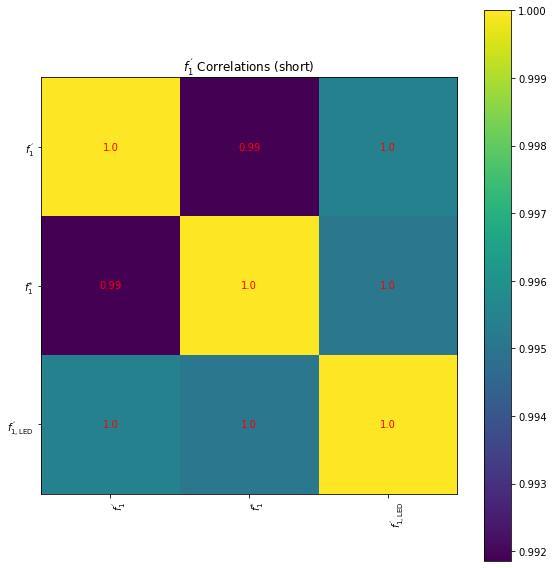

In [29]:
f1pEvalShort = np.vstack(( f1pA, f1pE, f1pLED ))
f1pEvalShortCorr = np.corrcoef(f1pEvalShort)
x_label_list_short = ['$f_{1}^{´}$', '$f_{1}^{*}$', '$f_{1,\mathrm{LED}}^{´}$']
plotCorrMatrixSamll(f1pEvalShortCorr, x_label_list_short, title='$f_{1}^{´}$ Correlations (short)', fileName='f1p Correlations short.png', with_values=True)

#### Calibrating with Standard Illuminant A the SMCF for Standard Illuminant A should be 1 for all detectors
#### Calibrating with Illuminant L the SMCF for Illuminant L should be 1 for all detectors, too.

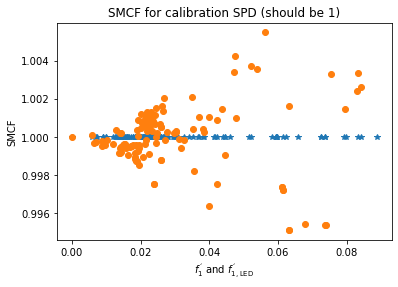

In [30]:
# 0 Illuminant A
# 1 Illuminant LED
pyplot.plot(f1pA, SMCF[0,:], '*')
pyplot.plot(f1pLED, SMCFLED[1,:], 'o')
pyplot.xlabel('$f_{1}^{´}$ and $f_{1,\mathrm{LED}}^{´}$')
pyplot.ylabel('SMCF')
pyplot.title('SMCF for calibration SPD (should be 1)')
pyplot.savefig('calibation check.png')

Remark: The dataset for Illuminant L in luxpy is not identical with the dataset in the PhotoLED project. Therfor there are very small differences.

#### Calibrating with Standard Illuminant A the SMCF for Illuminant L should be different from 1
#### Calibrating with Illuminant L the SMCF for Standard Illuminant A should be different from 1, too.

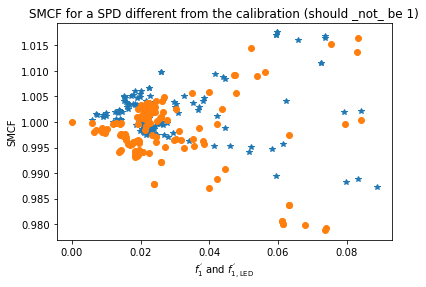

In [31]:
# 0 Illuminant A
# 1 Illuminant LED
# Attention: Here the LED is used for the calibration with A and vice versa
pyplot.plot(f1pA, SMCF[1,:], '*')
pyplot.plot(f1pLED, SMCFLED[0,:], 'o')
pyplot.xlabel('$f_{1}^{´}$ and $f_{1,\mathrm{LED}}^{´}$')
pyplot.ylabel('SMCF')
pyplot.title('SMCF for a SPD different from the calibration (should _not_ be 1)')
pyplot.savefig('check A LED reverse.png')


#### Calculating the mean SMCF for all lightsources (calibration Standard Illuminant A)

In [32]:
quantil = 0.05
QMax='QMax ' + str((1-quantil/2)*100) + r'%'
QMin='QMin ' + str((quantil/2)*100) + r'%'
meanA0=np.mean(abs(SMCF-1), axis=0)
meanA0_1=np.mean(SMCF, axis=0)
quantilAPlus=np.quantile( SMCF, 1-quantil/2, axis=0)
quantilAMinus=np.quantile( SMCF, quantil/2, axis=0)
quantilAPlusAbs=np.quantile( abs(SMCF-1), 1-quantil/2, axis=0)
quantilAMinusAbs=np.quantile( abs(SMCF-1), quantil/2, axis=0)

stdA0=np.std(abs(SMCF-1), axis=0)
stdA0_1=np.std(SMCF, axis=0)

meanLED=np.mean(abs(SMCFLED-1), axis=0)
meanLED_1=np.mean(SMCFLED, axis=0)
quantilLEDPlus=np.quantile( SMCFLED, 1-quantil/2, axis=0)
quantilLEDMinus=np.quantile( SMCFLED, quantil/2, axis=0)
quantilLEDPlusAbs=np.quantile( abs(SMCFLED-1), 1-quantil/2, axis=0)
quantilLEDMinusAbs=np.quantile( abs(SMCFLED-1), quantil/2, axis=0)
stdLED=np.std(abs(SMCFLED-1), axis=0)
stdLED_1=np.std(SMCFLED, axis=0)

In [33]:
def SMCFPlot( x_data_i, y_data_i, xlabel, ylabel, title, filename, qPlus=None, qMinus=None, sigma=None, ylabel2=None):

    # sort the database for the x values
    index = np.argsort(x_data_i)
    x_data=x_data_i[index]
    y_data=y_data_i[index]

    fig, ax1 = pyplot.subplots()
    ax2 = ax1.twinx()

    ax1.plot(x_data, y_data, '*', label=ylabel)
    if qPlus is not None:
        ax1.fill_between(x_data, qPlus, qMinus, alpha=0.2)
    if sigma is not None:
        ax2.plot(x_data, sigma, 'ro', label=ylabel2)

    if ylabel2 is not None:
        ax2.set_ylabel(ylabel2)
        ax2.spines['right'].set_color('red')
        ax2.yaxis.label.set_color('red')
        ax2.tick_params(axis='y', colors='red')

    ax1.set_xlabel( xlabel)
    ax1.set_ylabel(ylabel)

    pyplot.title(title)
    lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
    lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
    fig.legend(lines, labels, loc='upper left', bbox_to_anchor=(0, 1.03))
    pyplot.savefig(filename)


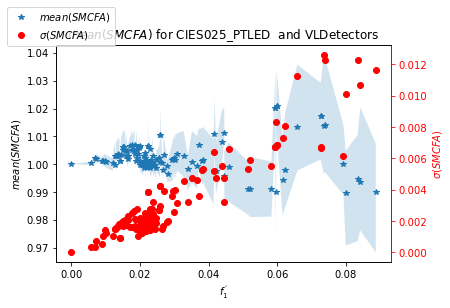

In [34]:
SMCFPlot( f1pA, meanA0_1, '$f_{1}^{´}$', '$mean(SMCFA)$', \
          '$mean(SMCFA)$ for ' + spd_names +  ' and ' + detector_names, 'f1Prime_mean_SMCFA.png', \
          qPlus=quantilAPlus, qMinus=quantilAMinus, sigma=stdA0_1, ylabel2='$\sigma(SMCFA)$' )

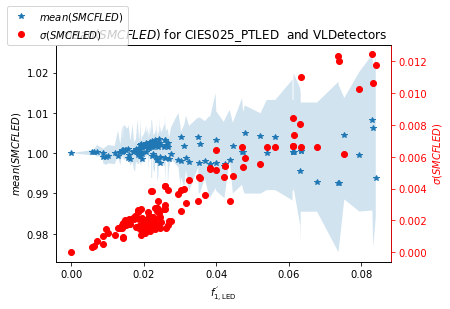

In [35]:
SMCFPlot( f1pLED, meanLED_1, '$f_{1,\mathrm{LED}}^{´}$', '$mean(SMCFLED)$', \
          '$mean(SMCFLED)$ for ' + spd_names +  ' and ' + detector_names, 'f1PrimeLED_mean_SMCFLED.png', \
          qPlus=quantilLEDPlus, qMinus=quantilLEDMinus, sigma=stdLED_1, ylabel2='$\sigma(SMCFLED)$' )


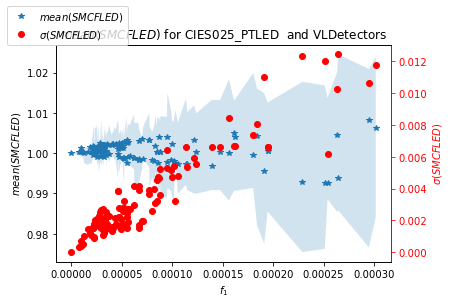

In [36]:
SMCFPlot( f1pp, meanLED_1, '$f_{1}}^{´´}$', '$mean(SMCFLED)$', \
          '$mean(SMCFLED)$ for ' + spd_names +  ' and ' + detector_names, 'f1Primeprime_mean_SMCFLED.png', \
          qPlus=quantilLEDPlus, qMinus=quantilLEDMinus, sigma=stdLED_1, ylabel2='$\sigma(SMCFLED)$' )

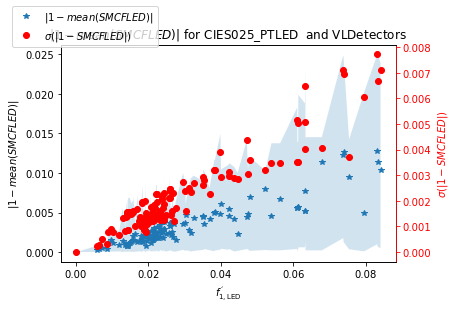

In [37]:
SMCFPlot( f1pLED, meanLED, '$f_{1,\mathrm{LED}}^{´}$', '$|1-mean(SMCFLED)|$', \
          '$|1-mean(SMCFLED)|$ for ' + spd_names +  ' and ' + detector_names, 'f1PrimepLED_meanabs_SMCFLED.png', \
          qPlus=quantilLEDPlusAbs, qMinus=quantilLEDMinusAbs, sigma=stdLED, ylabel2='$\sigma(|1-SMCFLED|)$' )

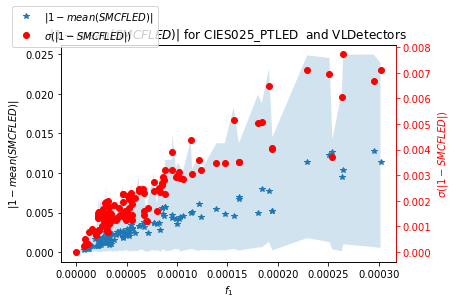

In [38]:
SMCFPlot( f1pp, meanLED, '$f_{1}}^{´´}$', '$|1-mean(SMCFLED)|$', \
          '$|1-mean(SMCFLED)|$ for ' + spd_names +  ' and ' + detector_names, 'f1Primeprime_meanabs_SMCFLED.png', \
          qPlus=quantilLEDPlusAbs, qMinus=quantilLEDMinusAbs, sigma=stdLED, ylabel2='$\sigma(|1-SMCFLED|)$' )

#### Calculating the standard deviation of the  SMCF for all lightsources (calibration Standard Illuminant A)

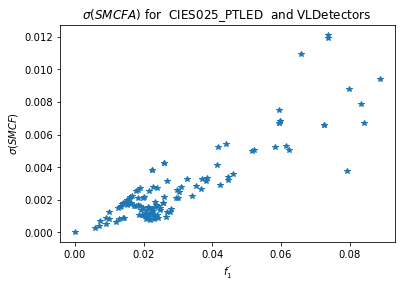

In [39]:
pyplot.plot(f1pA, stdA0, '*')

pyplot.xlabel('$f_{1}^{´}$')
pyplot.ylabel('$\sigma(SMCF)$')
pyplot.title('$\sigma(SMCFA)$ for  ' + spd_names +  ' and ' + detector_names)
pyplot.savefig('f1Prime_sigma_SMCFA.png')

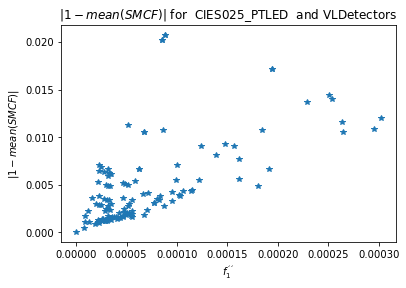

In [40]:
pyplot.plot(f1pp, meanA0, '*')
pyplot.xlabel('$f_{1}^{´´}$')
pyplot.ylabel('$|1-mean(SMCF)|$')
pyplot.title('$|1-mean(SMCF)|$ for  ' + spd_names +  ' and ' + detector_names)
pyplot.savefig('f1PrimePrime_mean_SMCFA.png')

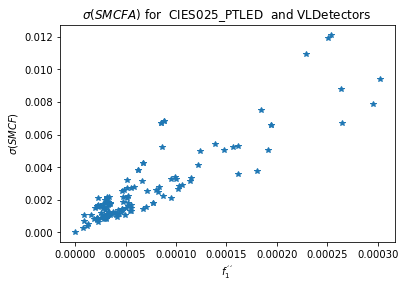

In [41]:
pyplot.plot(f1pp, stdA0, '*')
pyplot.xlabel('$f_{1}^{´´}$')
pyplot.ylabel('$\sigma(SMCF)$')
pyplot.title('$\sigma(SMCFA)$ for  ' + spd_names +  ' and ' + detector_names)
pyplot.savefig('f1PrimePrime_sigma_SMCFA.png')

#### Calculating the mean SMCF for all lightsources (calibration  Illuminant L)

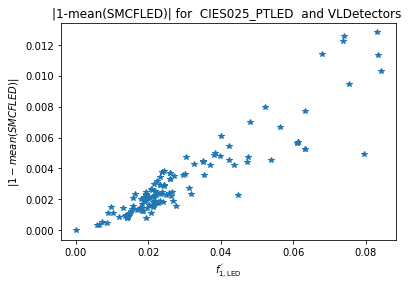

In [42]:
pyplot.plot(f1pLED, meanLED, '*')

pyplot.xlabel('$f_{1,\mathrm{LED}}^{´}$')
pyplot.ylabel('$|1-mean(SMCFLED)|$')
pyplot.title('|1-mean(SMCFLED)| for  ' + spd_names +  ' and ' + detector_names)
pyplot.savefig('f1PrimeLED_mean_SMCFLED.png')

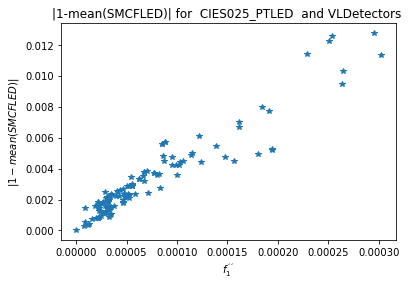

In [43]:
pyplot.plot(f1pp, meanLED, '*')

pyplot.xlabel('$f_{1}^{´´}$')
pyplot.ylabel('$|1-mean(SMCFLED)|$')
pyplot.title('|1-mean(SMCFLED)| for  ' + spd_names +  ' and ' + detector_names)
pyplot.savefig('f1Primeprime_mean_SMCFLED.png')

#### Calculating the standard deviation of the  SMCF for all lightsources (calibration Illuminant L)

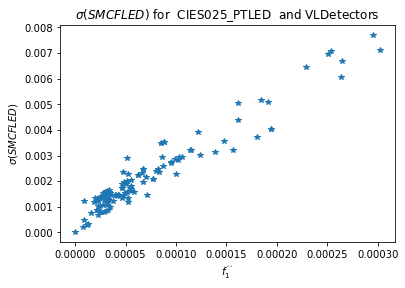

In [44]:

pyplot.plot(f1pp, stdLED, '*')

pyplot.xlabel('$f_{1}^{´´}$')
pyplot.ylabel('$\sigma(SMCFLED)$')
pyplot.title('$\sigma(SMCFLED)$ for  ' + spd_names +  ' and ' + detector_names)
pyplot.savefig('f1Primeprime_sigma_SMCFLED.png')

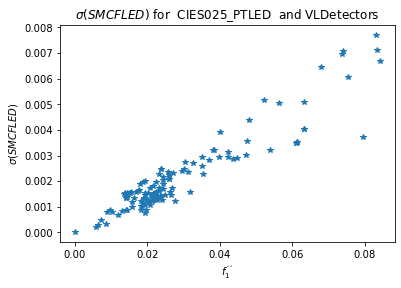

In [45]:
pyplot.plot(f1pLED, stdLED, '*')

pyplot.xlabel('$f_{1}^{´´}$')
pyplot.ylabel('$\sigma(SMCFLED)$')
pyplot.title('$\sigma(SMCFLED)$ for  ' + spd_names +  ' and ' + detector_names)
pyplot.savefig('f1PrimeLED_sigma_SMCFLED.png')

# Correlation
#### Let's have a look at all correlations (between all the characteristics calculated before)

In [46]:
f1pEval2 = np.vstack(( f1pA, f1pE, f1pLED, f1pAFMin, f1pAFCutOffR, f1pp, f1pBW20nm, meanA0, stdA0, stdA0_1, meanLED, stdLED, stdLED_1))
f1pEvalCorr2 = np.corrcoef(f1pEval2)
x_label_list = ['$f_{1}^{´}$', '$f_{1}^{*}$', '$f_{1,\mathrm{LED}}^{´}$', '$f_{1,\mathrm{Min}}^{´}$', '$f_{1,\mathrm{R}}^{´´}$', '$f_{1}^{´´}$', '$f_{1,\mathrm{BW20nm}}^{´}$', \
               'SMCFA', '$\sigma(|1-SMCFA|)$', '$\sigma(SMCFA)$', 'SMCFLED', '$\sigma(|1-SMCFLED|)$', '$\sigma(SMCFLED)$']
corr = np.corrcoef(f1pp, meanLED)

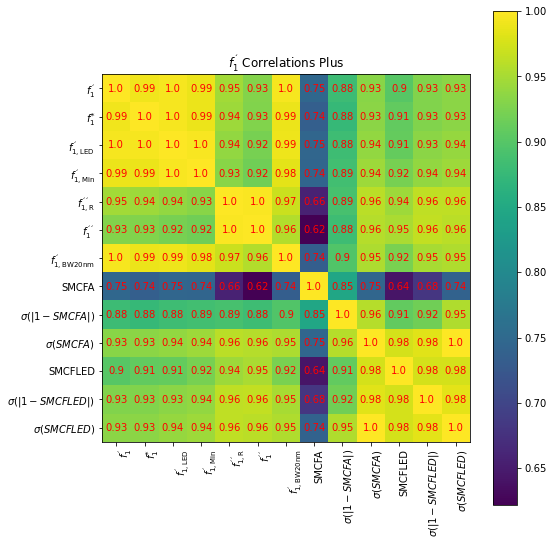

In [47]:
plotCorrMatrixSamll(f1pEvalCorr2, x_label_list, title='$f_{1}^{´}$ Correlations Plus', fileName='f1p Correlations2.png', with_values=True)

# Sensitivity investigations
#### Noise at different wavelength positions (influence of the weighting function)

(83, 81)

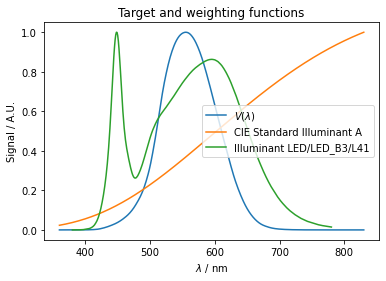

In [48]:
pyplot.plot(lx._CMF['1931_2']['bar'][0], lx._CMF['1931_2']['bar'][2], label='$V(\lambda)$')
pyplot.plot(lx._CIE_ILLUMINANTS['A'][0], lx._CIE_ILLUMINANTS['A'][1]/np.max(lx._CIE_ILLUMINANTS['A'][1]), label='CIE Standard Illuminant A')
pyplot.plot(lx._CIE_ILLUMINANTS['LED_B3'][0], lx._CIE_ILLUMINANTS['LED_B3'][1]/np.max(lx._CIE_ILLUMINANTS['LED_B3'][1]), label='Illuminant LED/LED_B3/L41')

pyplot.xlabel('$\lambda$ / nm')
pyplot.ylabel('Signal / A.U.')
pyplot.title('Target and weighting functions')
pyplot.legend()
pyplot.savefig('Target and weighting.png')

VLDetectorNoise = _RES['VLSimNoise']['S']['data'].copy()
VLDetectorNoise.shape

In [49]:
nf1pA=lx.spectral_mismatch_and_uncertainty.f1prime(VLDetectorNoise, S_C='A', cieobs='1931_2', s_target_index=2)
nf1pE=lx.spectral_mismatch_and_uncertainty.f1prime(VLDetectorNoise, S_C='E', cieobs='1931_2', s_target_index=2)
nf1pLED=lx.spectral_mismatch_and_uncertainty.f1prime(VLDetectorNoise, S_C='LED_B3', cieobs='1931_2', s_target_index=2)
nf1pA_py=py_f1PrimeGlx(VLDetectorNoise, strObserver='1931_2', iObserverOffset = 1, strWeighting='A', iMin=0, dCutOff=0., dBandWidth=0.)
nf1pAFMin=py_f1PrimeGlx(VLDetectorNoise, strObserver='1931_2', iObserverOffset = 1, strWeighting='A', iMin=1, dCutOff=0., dBandWidth=0.)
nf1pAFCutOffR=py_f1PrimeGlx(VLDetectorNoise, strObserver='1931_2', iObserverOffset = 1, strWeighting='E', iMin=0, dCutOff=-dCutOff, dBandWidth=0.)
nf1pp=py_f1PrimeGlx(VLDetectorNoise, strObserver='1931_2', iObserverOffset = 1, strWeighting='E', iMin=0, dCutOff=dCutOff, dBandWidth=0.)
nf1pBW20nm=py_f1PrimeGlx(VLDetectorNoise, strObserver='1931_2', iObserverOffset = 1, strWeighting='A', iMin=0, dCutOff=0., dBandWidth=20.)

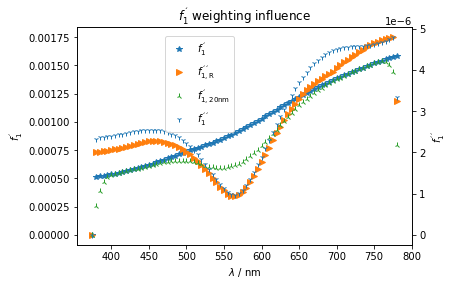

In [50]:
xRange = np.arange(375,780+1,5)
fig, ax1 = pyplot.subplots()
ax2 = ax1.twinx()

ax1.plot(xRange, nf1pA, '*', label='$f_{1}^{´}$')
#pyplot.plot(xRange, nf1pE, 'x', label='$f_{1}^{*}$')
#pyplot.plot(xRange, nf1pLED, 'o', label='$f_{1,\mathrm{LED}}^{´}$')
#pyplot.plot(xRange, nf1pAFMin, '<', label='$f_{1,\mathrm{Min}}^{´}$')
ax1.plot(xRange, nf1pAFCutOffR, '>', label='$f_{1, \mathrm{R}}^{´´}$')
ax1.plot(xRange, nf1pBW20nm, '2', label='$f_{1,\mathrm{20nm}}^{´}$')
ax2.plot(xRange, nf1pp, '1', label='$f_{1}^{´´}$')

ax1.set_xlabel('$\lambda$ / nm')
ax1.set_ylabel('$f_{1}^{´}$')
ax2.set_ylabel('$f_{1}^{´´}$')
pyplot.title('$f_{1}^{´}$ weighting influence')
lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, loc='lower right', bbox_to_anchor=(0.5, 0.5))
pyplot.savefig('weighting influence.png')

#### Influence of the wavelength shift to the detector characteristics

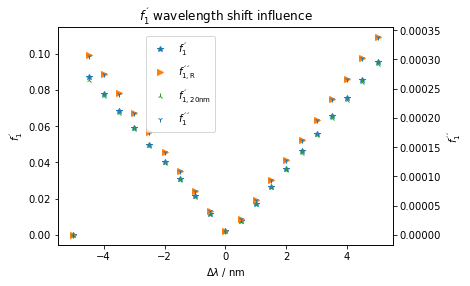

In [51]:
VLDetectorShift = _RES['VLSimShift']['S']['data'].copy()

sf1pA=lx.spectral_mismatch_and_uncertainty.f1prime(VLDetectorShift, S_C='A', cieobs='1931_2', s_target_index=2)
sf1pE=lx.spectral_mismatch_and_uncertainty.f1prime(VLDetectorShift, S_C='E', cieobs='1931_2', s_target_index=2)
sf1pLED=lx.spectral_mismatch_and_uncertainty.f1prime(VLDetectorShift, S_C='LED_B3', cieobs='1931_2', s_target_index=2)
sf1pA_py=py_f1PrimeGlx(VLDetectorShift, strObserver='1931_2', iObserverOffset = 1, strWeighting='A', iMin=0, dCutOff=0., dBandWidth=0.)
sf1pAFMin=py_f1PrimeGlx(VLDetectorShift, strObserver='1931_2', iObserverOffset = 1, strWeighting='A', iMin=1, dCutOff=0., dBandWidth=0.)
sf1pAFCutOffR=py_f1PrimeGlx(VLDetectorShift, strObserver='1931_2', iObserverOffset = 1, strWeighting='E', iMin=0, dCutOff=-dCutOff, dBandWidth=0.)
sf1pp=py_f1PrimeGlx(VLDetectorShift, strObserver='1931_2', iObserverOffset = 1, strWeighting='E', iMin=0, dCutOff=dCutOff, dBandWidth=0.)
sf1pBW20nm=py_f1PrimeGlx(VLDetectorShift, strObserver='1931_2', iObserverOffset = 1, strWeighting='A', iMin=0, dCutOff=0., dBandWidth=20.)

fig, ax1 = pyplot.subplots()
ax2 = ax1.twinx()

xRange = np.arange(-5,5+0.2,0.1)
subPlot = 5
ax1.plot(xRange[::subPlot], sf1pA[::subPlot], '*', label='$f_{1}^{´}$')
#pyplot.plot(xRange[::subPlot], sf1pE[::subPlot], 'x', label='$f_{1}^{*}$')
#pyplot.plot(xRange[::subPlot], sf1pLED[::subPlot], 'o', label='$f_{1,\mathrm{LED}}^{´}$')
#pyplot.plot(xRange[::subPlot], sf1pAFMin[::subPlot], '<', label='$f_{1,\mathrm{Min}}^{´}$')
ax1.plot(xRange[::subPlot], sf1pAFCutOffR[::subPlot], '>', label='$f_{1, \mathrm{R}}^{´´}$')
ax1.plot(xRange[::subPlot], sf1pBW20nm[::subPlot], '2', label='$f_{1,\mathrm{20nm}}^{´}$')
ax2.plot(xRange[::subPlot], sf1pp[::subPlot], '1', label='$f_{1}^{´´}$')

ax1.set_xlabel('$\Delta\lambda$ / nm')
ax1.set_ylabel('$f_{1}^{´}$')
ax2.set_ylabel('$f_{1}^{´´}$')
pyplot.title('$f_{1}^{´}$ wavelength shift influence')
lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, loc='lower right', bbox_to_anchor=(0.5, 0.5))
pyplot.savefig('f1Prime_Sens_WLShift.png')

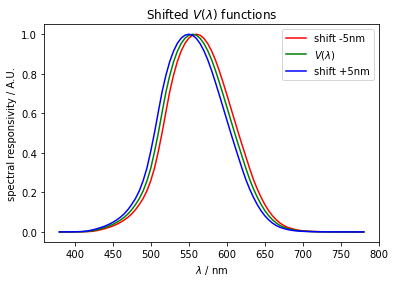

In [52]:
VLDetectorNumber = VLDetectorShift.shape[0]
pyplot.plot(VLDetectorShift[0,:], VLDetectorShift[2,:], 'r-', label='shift -5nm')
pyplot.plot(VLDetectorShift[0,:], VLDetectorShift[int((VLDetectorNumber-1)/2),:], 'g-', label='$V(\lambda)$')
pyplot.plot(VLDetectorShift[0,:], VLDetectorShift[VLDetectorNumber-1,:], 'b-', label='shift +5nm')
pyplot.xlabel('$\lambda$ / nm')
pyplot.ylabel('spectral responsivity / A.U.')
pyplot.title('Shifted $V(\lambda$) functions')
pyplot.legend()
pyplot.savefig('VLShifts.png')


In [53]:
def f1pMinMaxScatter( SMCFDataI, f1pData, title=None, xlabel=None, ylabel=None, filename=None, takeAbs=False, f1pIgnore=0):
    if takeAbs:
        SMCFData = np.abs(1-SMCFDataI[:,1:])
    else:
        SMCFData = SMCFDataI[:,1:]

    f1pScatter = np.zeros((SMCFData.shape[0],SMCFData.shape[1]))
    f1pScatter[:,]=f1pData[1:]

    if takeAbs:
        SMCFData[np.where( f1pScatter < f1pIgnore)]=0.
    else:
        SMCFData[np.where( f1pScatter < f1pIgnore)]=1.

    if takeAbs:
        smcfSlope = SMCFData / f1pScatter
    else:
        smcfSlope = (SMCFData-1) / f1pScatter

    if takeAbs:
        smcfSlopeQMax = np.max( np.quantile(smcfSlope, 0.95, axis=0))
    else:
        smcfSlopeQMin = np.quantile( np.min(smcfSlope, axis=0), 0.025)
        smcfSlopeQMax = np.quantile( np.max(smcfSlope, axis=0), 0.975)

    pyplot.scatter(f1pScatter, SMCFData, label='SMCFA')
    if takeAbs:
        pyplot.plot( [0,0.1], [0, smcfSlopeQMax*0.1], label='Max Quantile')
        pyplot.ylim(0.0, 0.15)
    else:
        pyplot.plot( [0,0.1], [1, smcfSlopeQMax*0.1+1], label='Max Quantile')
        pyplot.plot( [0,0.1], [1, smcfSlopeQMin*0.1+1], label='Min Quantile')
        pyplot.ylim(0.85, 1.15)
    if xlabel is None:
        pyplot.xlabel('$f_{1}^{´}$')
    else:
        pyplot.xlabel(xlabel)
    if ylabel is None:
        pyplot.ylabel('SMCF')
    else:
        pyplot.ylabel(ylabel)
    if title is None:
        pyplot.title('')
    else:
        pyplot.title(title)

    meanData = np.mean(SMCFData, axis = 0)
    pyplot.scatter( f1pData[1:], meanData, label='$|1-SMCF_{\mathrm{Mean}}|$')

    pyplot.legend()

    if takeAbs:
        pyplot.text(0.00, 0.05, 'Max. Slope:'+ '{:.2f}'.format(smcfSlopeQMax))
    else:
        pyplot.text(0.00, 1.05, 'Max. Slope:'+ '{:.2f}'.format(smcfSlopeQMax))
        pyplot.text(0.00, 0.95, 'Min. Slope:'+ '{:.2f}'.format(smcfSlopeQMin))


    if filename is not None:
        pyplot.savefig(filename)

    return smcfSlope

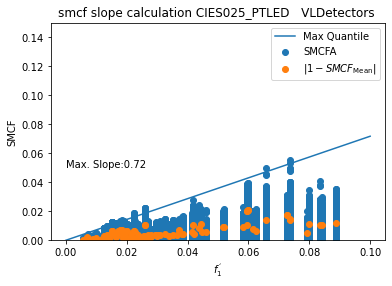

In [54]:
takeAbs=True
takeLog = True
hBins=100
smcfSlope = f1pMinMaxScatter( SMCF, f1p, takeAbs=takeAbs, title='smcf slope calculation ' + spd_names + '  ' + detector_names, filename='SMCFSlope.png')

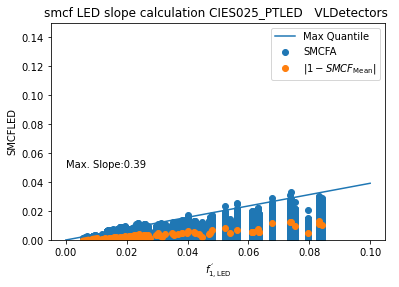

In [55]:
smcfSlopeLED = f1pMinMaxScatter( SMCFLED, f1pLED, takeAbs=takeAbs, xlabel='$f_{1,\mathrm{LED}}^{´}$', ylabel='SMCFLED', title='smcf LED slope calculation ' + spd_names + '  ' + detector_names, filename='SMCFLEDSlope.png')

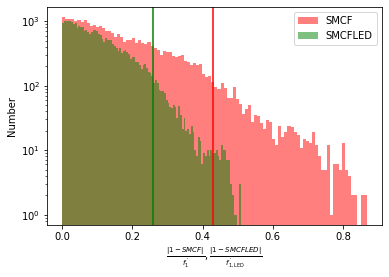

In [56]:
fig, ax = pyplot.subplots()
ax.set_xlabel(r'$\frac{|1-SMCF|}{f_{1}^{´}}, \frac{|1-SMCFLED|}{f_{1,\mathrm{LED}}^{´}}$')
ax.set_ylabel('Number')
ax.hist(smcfSlope.flatten(), bins=hBins, log=takeLog, label='SMCF', color = 'r', alpha = 0.5)
pyplot.axvline(np.quantile( smcfSlope, 0.95), color = 'r')
ax.hist(smcfSlopeLED.flatten(), bins=hBins, log=takeLog, label='SMCFLED', color = 'g', alpha = 0.5)
pyplot.axvline(np.quantile( smcfSlopeLED, 0.95), color = 'g')
ax.legend()
pyplot.savefig('Hist_Ratio_f1pf1pLED.png')

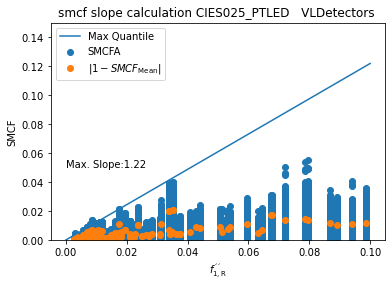

In [57]:
smcfSlope = f1pMinMaxScatter( SMCF, f1pAFCutOffR, takeAbs=takeAbs, xlabel='$f_{1,\mathrm{R}}^{´´}$', ylabel='SMCF', title='smcf slope calculation ' + spd_names + '  ' + detector_names, filename='SMCFSlopef1ppR.png')

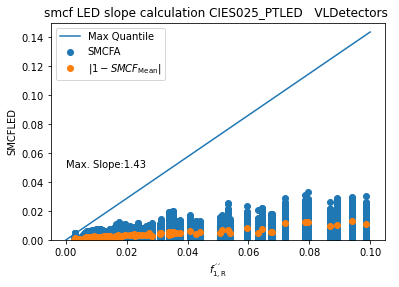

In [58]:
smcfSlopeLED = f1pMinMaxScatter( SMCFLED, f1pAFCutOffR, takeAbs=takeAbs, xlabel='$f_{1,\mathrm{R}}^{´´}$', ylabel='SMCFLED', title='smcf LED slope calculation ' + spd_names + '  ' + detector_names, filename='SMCFLEDSlopef1ppR.png')

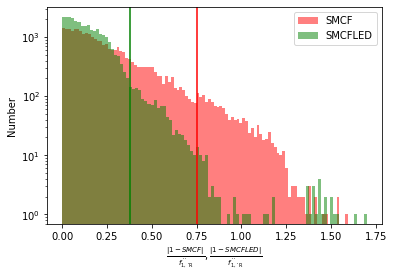

In [59]:
fig, ax = pyplot.subplots()
ax.set_xlabel(r'$\frac{|1-SMCF|}{f_{1,\mathrm{´R}}^{´´}}, \frac{|1-SMCFLED|}{f_{1,\mathrm{´R}}^{´´}}$')
ax.set_ylabel('Number')
ax.hist(smcfSlope.flatten(), alpha = 0.5, bins=hBins, log=takeLog, label='SMCF', color = 'r')
pyplot.axvline(np.quantile( smcfSlope, 0.95), color = 'r')
ax.hist(smcfSlopeLED.flatten(), alpha = 0.5, bins=hBins, log=takeLog, label='SMCFLED', color = 'g')
pyplot.axvline(np.quantile( smcfSlopeLED, 0.95), color = 'g')
ax.legend()
pyplot.savefig('Hist_Ratio_f1ppRf1ppRLED.png')

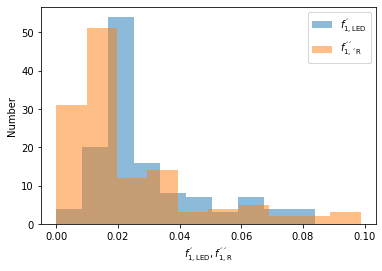

In [60]:
fig, ax = pyplot.subplots()
ax.set_xlabel(r'${f_{1,\mathrm{LED}}^{´}}, {f_{1,\mathrm{R}}^{´´}}$')
ax.set_ylabel('Number')
ax.hist(f1pLED.flatten(),  alpha = 0.5, log=False, label='$f_{1,\mathrm{LED}}^{´}}$')
ax.hist(f1pAFCutOffR.flatten(), alpha = 0.5, log=False, label='${f_{1,\mathrm{´R}}^{´´}}$')
ax.legend()
pyplot.savefig('Hist_Comp_f1pf1ppR.png')

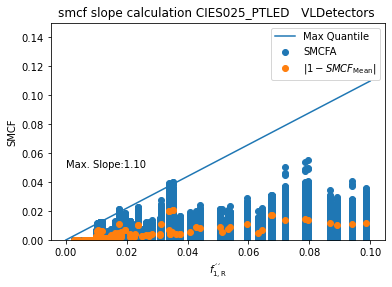

In [61]:
f1pIgnore = 0.01

smcfSlope = f1pMinMaxScatter( SMCF, f1pAFCutOffR, f1pIgnore = f1pIgnore, takeAbs=takeAbs, xlabel='$f_{1,\mathrm{R}}^{´´}$', ylabel='SMCF', title='smcf slope calculation ' + spd_names + '  ' + detector_names, filename='SMCFSlopef1ppR_I.png')

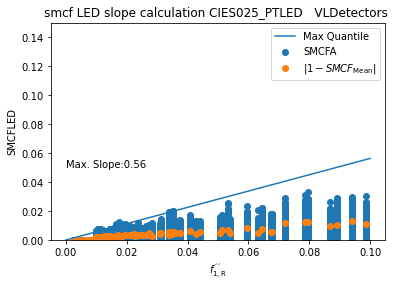

In [62]:
smcfSlopeLED = f1pMinMaxScatter( SMCFLED, f1pAFCutOffR, f1pIgnore = f1pIgnore, takeAbs=takeAbs, xlabel='$f_{1,\mathrm{R}}^{´´}$', ylabel='SMCFLED', title='smcf LED slope calculation ' + spd_names + '  ' + detector_names, filename='SMCFLEDSlopef1ppR_I.png')

<ipython-input-63-904eba185e7d>:18: ComplexWarning: Casting complex values to real discards the imaginary part
  [f1Array[1,i], detaVectorArray[1,i]] = py_f1PrimeG(vldetectors[0], vldetectors[detectorList[i]], strObserver='1931_2', iObserverOffset = 1, strWeighting='E', iMin=0, dCutOff=-0.003, dBandWidth=0.)


#:	 [1]
$f_{1}_^{´}:	$ [3.6133e-05]
$f_{1, \mathrm{R}}_^{´´}:	$ [3.7645e-07]
$f_{1, \mathrm{BW}}_^{´}:	$ [1.7314e-06]


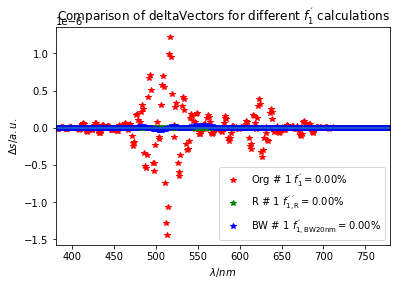

In [63]:
import random
from sigfig import round
vlDetectorNumber = vldetectors.shape[0]-1
vlDetectorListNumber = 1
if vlDetectorListNumber < vlDetectorNumber:
    detectorList = [random.randint(1, vlDetectorNumber) for p in range(1, vlDetectorListNumber+1)]
else:
    detectorList = range(1, vlDetectorNumber+1)
    vlDetectorListNumber = vlDetectorNumber

detectorList[0]=1

f1Array = np.zeros( (3, vlDetectorListNumber))
detaVectorArray = np.zeros( (3, vlDetectorListNumber, vldetectors.shape[1]))

for i in range(0, vlDetectorListNumber):
    [f1Array[0,i], detaVectorArray[0,i]] = py_f1PrimeG(vldetectors[0], vldetectors[detectorList[i]], strObserver='1931_2', iObserverOffset = 1, strWeighting='A', iMin=0, dCutOff=0., dBandWidth=0.)
    [f1Array[1,i], detaVectorArray[1,i]] = py_f1PrimeG(vldetectors[0], vldetectors[detectorList[i]], strObserver='1931_2', iObserverOffset = 1, strWeighting='E', iMin=0, dCutOff=-0.003, dBandWidth=0.)
    [f1Array[2,i], detaVectorArray[2,i]] = py_f1PrimeG(vldetectors[0], vldetectors[detectorList[i]], strObserver='1931_2', iObserverOffset = 1, strWeighting='A', iMin=0, dCutOff=0., dBandWidth=20.)

    fig, ax = pyplot.subplots()
    strLabel = 'Org # ' + str(detectorList[i]) + ' $f_{1}^{´}=$' + round(str(f1Array[0,i]*100), decimals=2) + r'%'
    ax.plot(vldetectors[0], detaVectorArray[0,i],'r*', label=strLabel)
    strLabel = 'R # ' + str(detectorList[i]) + ' $f_{1,\mathrm{R}}^{´´}=$' + round(str(f1Array[1,i]*100), decimals=2) + r'%'
    ax.plot(vldetectors[0], detaVectorArray[1,i],'g*', label=strLabel)
    strLabel = 'BW # ' + str(detectorList[i]) + ' $f_{1,\mathrm{BW 20nm}}^{´}=$' + round(str(f1Array[2,i]*100), decimals=2) + r'%'
    ax.plot(vldetectors[0], detaVectorArray[2,i],'b*', label=strLabel)
    ax.set_xlim(left=380, right=780)
    ax.axhline(0)
    ax.legend()
    pyplot.title('Comparison of deltaVectors for different $f_{1}^{´}$ calculations')
    strFile = 'Comp_DeltaVectorsVLNr' + str(i) + '.png'
    pyplot.ylabel('$\Delta s / a.u.$')
    pyplot.xlabel('$\lambda / nm$')
    pyplot.savefig(strFile)


print('#:\t', detectorList)
print('$f_{1}_^{´}:\t$', f1Array[0])
print('$f_{1, \mathrm{R}}_^{´´}:\t$', f1Array[1])
print('$f_{1, \mathrm{BW}}_^{´}:\t$', f1Array[2])

Value= [0.9995601183911674, 0.0015140138611507066] Inteval(95%)= 0.005324550056947985
Value= [0.0013549333753058884, 0.0008061571497095001] Inteval(95%)= 0.003116424091722525
Value= [0.9993160519583814, 0.001513644178571868] Inteval(95%)= 0.005323249941111885
Value= [0.0014331659794966254, 0.0008396063947897803] Inteval(95%)= 0.0030985249964163852


F:\TTBV\Python\empir19nrm02\empir19nrm02\tools\plotting.py:86: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


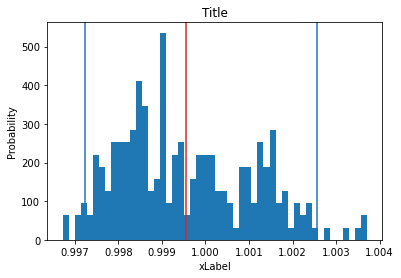

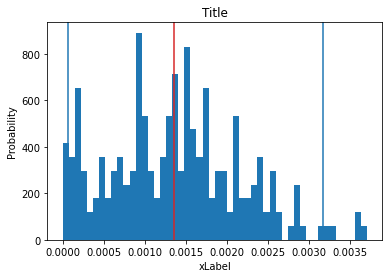

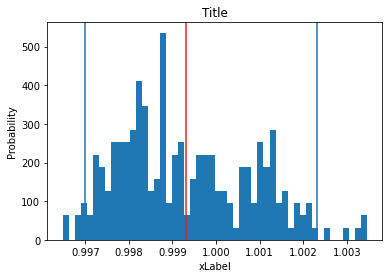

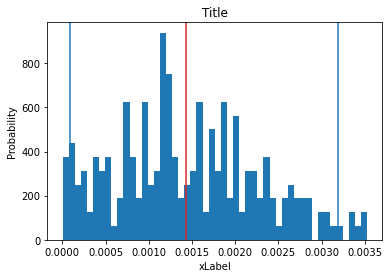

In [64]:
detectorList[i]=10
for i in range(0, vlDetectorListNumber):
    SMCFDetector = SMCF[:,detectorList[i]]
    SMCFLEDDetector = SMCFLED[:,detectorList[i]]

    plotHistScales(SMCFDetector)
    plotHistScales(abs(1-SMCFDetector))

    plotHistScales(SMCFLEDDetector)
    plotHistScales(abs(1-SMCFLEDDetector))

In [65]:
np.savetxt('f1pEval.csv', f1pEval, delimiter=';')
np.savetxt('specTestl.csv', vldetectors, delimiter=';')

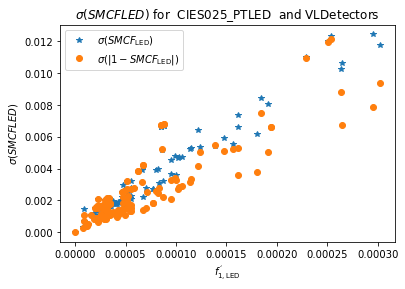

In [66]:
stdLED1=np.std(SMCFLED, axis=0)
stdLED2=np.std(abs(SMCF-1), axis=0)
pyplot.plot(f1pp, stdLED1, '*', label='$\sigma(SMCF_{\mathrm{LED}})$')
pyplot.plot(f1pp, stdLED2, 'o', label='$\sigma(|1-SMCF_{\mathrm{LED}}|)$')

pyplot.xlabel('$f_{1,\mathrm{LED}}^{´}$')
pyplot.ylabel('$\sigma(SMCFLED)$')
pyplot.title('$\sigma(SMCFLED)$ for  ' + spd_names +  ' and ' + detector_names)
pyplot.legend()
pyplot.savefig('f1PrimeLED_sigma_SMCFLED2.png')

# Ende Gelände